In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv("winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [8]:
data['vinho_bom'] = data['quality'].map(lambda x: 0 if x < 7 else 1)

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vinho_bom
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [10]:
from lightgbm import LGBMClassifier

In [11]:
?LGBMClassifier

Init signature:
LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    subsample_for_bin=200000,
    objective=None,
    class_weight=None,
    min_split_gain=0.0,
    min_child_weight=0.001,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,
    n_jobs=-1,
    silent=True,
    importance_type='split',
    **kwargs,
)
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for b

In [12]:
from sklearn.model_selection import train_test_split

In [15]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data.iloc[:, :-2], data['vinho_bom'], train_size=0.5)

In [16]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((799, 11), (800, 11), (799,), (800,))

In [18]:
Xtrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1214,10.2,0.33,0.46,1.9,0.081,6.0,9.0,0.99628,3.10,0.48,10.4
1196,7.9,0.58,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5
227,9.0,0.82,0.14,2.6,0.089,9.0,23.0,0.99840,3.39,0.63,9.8
1179,8.2,0.35,0.33,2.4,0.076,11.0,47.0,0.99599,3.27,0.81,11.0
425,6.6,0.84,0.03,2.3,0.059,32.0,48.0,0.99520,3.52,0.56,12.3


In [19]:
10**7

10000000

10 * 10 * 10 ...

In [24]:
mdl = LGBMClassifier(random_state=0)
mdl.fit(Xtrain, ytrain)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [25]:
from sklearn.metrics import roc_auc_score
p = mdl.predict_proba(Xtest)[:, 1]

In [26]:
roc_auc_score(ytest, p)

0.8882241486710964

# Random search - busca aleatória

1, 2, 3, 4, 5 - [1,2,3,4,5] -> [2], [5]

In [22]:
from skopt import dummy_minimize

In [23]:
?dummy_minimize

Signature:
dummy_minimize(
    func,
    dimensions,
    n_calls=100,
    x0=None,
    y0=None,
    random_state=None,
    verbose=False,
    callback=None,
)
Docstring:
Random search by uniform sampling within the given bounds.

Parameters
----------
* `func` [callable]:
    Function to minimize. Should take a single list of parameters
    and return the objective value.

    If you have a search-space where all dimensions have names,
    then you can use `skopt.utils.use_named_args` as a decorator
    on your objective function, in order to call it directly
    with the named arguments. See `use_named_args` for an example.

* `dimensions` [list, shape=(n_dims,)]:
    List of search space dimensions.
    Each search dimension can be defined either as

    - a `(lower_bound, upper_bound)` tuple (for `Real` or `Integer`
      dimensions),
    - a `(lower_bound, upper_bound, prior)` tuple (for `Real`
      dimensions),
    - as a list of categories (for `Categorical` dimensions), or
    

In [28]:
def treinar_modelo(params):
    learning_rate = params[0]
    num_leaves = params[1]
    min_child_samples = params[2]
    subsample = params[3]
    colsample_bytree = params[4]
    
    print(params, '\n')
    
    mdl = LGBMClassifier(learning_rate=learning_rate, num_leaves=num_leaves, min_child_samples=min_child_samples,
                        subsample=subsample, colsample_bytree=colsample_bytree, random_state=0, subsample_freq=1, 
                         n_estimators=100)
    mdl.fit(Xtrain, ytrain)
    
    p = mdl.predict_proba(Xtest)[:,1]
    
    return -roc_auc_score(ytest, p)

space = [(1e-3, 1e-1, 'log-uniform'), #learning rate
         (2, 128), # num_leaves
         (1, 100), # min_child_samples
         (0.05, 1.0), # subsample
         (0.1, 1.0)] # colsample bytree

resultado = dummy_minimize(treinar_modelo, space, random_state=1, verbose=1, n_calls=30)

Iteration No: 1 started. Evaluating function at random point.
[0.09871192514273254, 74, 10, 0.3372159440002478, 0.23208030173540176] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.3388
Function value obtained: -0.8870
Current minimum: -0.8870
Iteration No: 2 started. Evaluating function at random point.
[0.001529949829431263, 78, 72, 0.3782826906908954, 0.457090726807603] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0598
Function value obtained: -0.8382
Current minimum: -0.8870
Iteration No: 3 started. Evaluating function at random point.
[0.01195730942971637, 128, 19, 0.5483207515942279, 0.49910760440160107] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1734
Function value obtained: -0.8831
Current minimum: -0.8870
Iteration No: 4 started. Evaluating function at random point.
[0.0028784217488024557, 16, 51, 0.9182639233502714, 0.5114843271882895] 

Iteration No: 4 ended. Evaluation done at random point.
Time

In [29]:
resultado.x

[0.03844210597293627, 93, 22, 0.8889692020284521, 0.5867093706408683]

In [ ]:
# auc = 0.8924 - [0.03844210597293627, 93, 22, 0.8889692020284521, 0.5867093706408683]

# Bayesian Optimization

In [ ]:
[0.03844210597293627, 93, 22, 0.8889692020284521, 0.5867093706408683] -> 0.8924
[0.0011282932078263237, 23, 41, 0.28390051422289364, 0.8740251538145993] -> 0.8398

In [30]:
from skopt import gp_minimize

In [31]:
resultados_gp = gp_minimize(treinar_modelo, space, random_state=1, verbose=1, n_calls=30, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[0.09871192514273254, 120, 14, 0.9990884895579377, 0.3124800792567785] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.6467
Function value obtained: -0.8849
Current minimum: -0.8849
Iteration No: 2 started. Evaluating function at random point.
[0.006210998932353835, 51, 67, 0.9387621172657304, 0.8616798250174156] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1594
Function value obtained: -0.8577
Current minimum: -0.8849
Iteration No: 3 started. Evaluating function at random point.
[0.004232013397179603, 68, 45, 0.2680983530433343, 0.5809725180523154] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0904
Function value obtained: -0.8380
Current minimum: -0.8849
Iteration No: 4 started. Evaluating function at random point.
[0.0672858974212934, 60, 44, 0.9421713999524447, 0.8005503127028804] 

Iteration No: 4 ended. Evaluation done at random point.
Time ta

In [36]:
from skopt.plots import plot_convergence

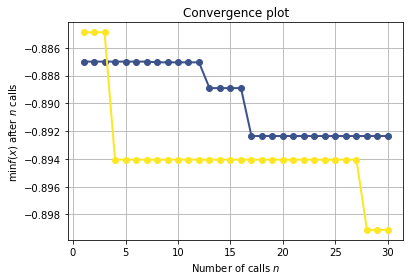

In [40]:
plot_convergence(resultado, resultados_gp)

# exploration exploitation tradeoff

In [34]:
resultados_gp.x

[0.1, 118, 1, 0.41832604811717616, 0.8614352657429701]

In [ ]:
# auc = 0.8924 - [0.03844210597293627, 93, 22, 0.8889692020284521, 0.5867093706408683]
# auc = 0.8991 - [0.1, 118, 1, 0.41832604811717616, 0.8614352657429701